In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Create a DataFrame from your data
data = pd.DataFrame({
    'Date': pd.date_range(start='2020-03-01', end='2021-09-01', freq='M'),
    'GDP': [92.3, 74.9, 77.0, 84.2, 90.8, 92.8, 94.4, 95.1, 92.9, 93.8, 91.5, 92.3, 94.2, 96.9, 97.5, 98.9, 98.8, 99.2]
})

# Set the date column as the index
data.set_index('Date', inplace=True)


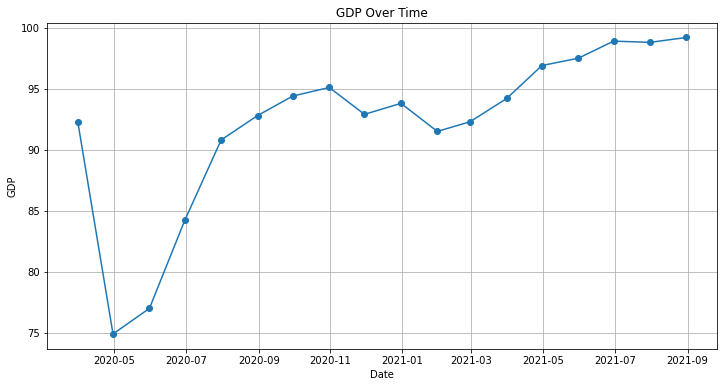

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['GDP'], marker='o')
plt.title('GDP Over Time')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.grid(True)
plt.show()


In [11]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['GDP'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -0.2067148255382063
p-value: 0.9377164807227452


In [12]:
# Example: ARIMA(1,1,1) model
model = sm.tsa.ARIMA(data['GDP'], order=(1,1,1))
results = model.fit()

# Print model summary
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                   18
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -51.209
Date:                Sat, 03 Feb 2024   AIC                            108.418
Time:                        13:33:44   BIC                            110.918
Sample:                    03-31-2020   HQIC                           108.667
                         - 08-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8009      1.372      0.584      0.560      -1.889       3.491
ma.L1         -0.9989     95.280     -0.010      0.992    -187.744     185.746
sigma2        22.7721   2144.649      0.011      0.9

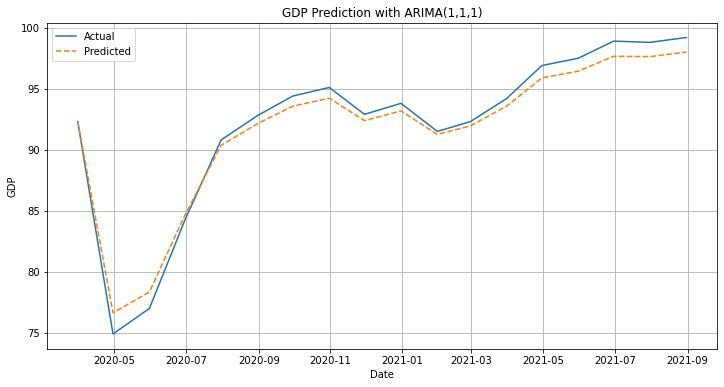

In [13]:
# Predictions
predictions = results.predict(start=1, end=len(data))

# Plot predictions vs. actual data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['GDP'], label='Actual')
plt.plot(data.index, predictions, label='Predicted', linestyle='--')
plt.title('GDP Prediction with ARIMA(1,1,1)')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.legend()
plt.grid(True)
plt.show()